In [2]:
from qiskit import QuantumCircuit
import qiskit
from qiskit import transpile
from src.GCP_hypergraph import QuantumCircuitHyperGraph

from qiskit.circuit.library import QFT, RGQFTMultiplier, HRSCumulativeMultiplier
from src.FM_methods import set_initial_partitions

import qiskit.qasm3
from circuits.QAOA import QAOA_random
import qiskit.qasm.libs

path = '/Users/ftb123/QASMBench/QASMBench/large/QAOA_3SAT_N100_p100/random_QAOA_angles_k3_N100_p100.qasm'

circuit =  qiskit.qasm3.load(path)

# circuit = QuantumCircuit.from_qasm_file(path)

# circuit = QAOA_random(num_qubits=48, prob = 10, reps = 1)
# circuit = QFT(63)

# circuit = HRSCumulativeMultiplier(5,num_result_qubits=None)

circuit = transpile(circuit, basis_gates = ['cp', 'u'])




depth = circuit.depth()
num_qubits = circuit.num_qubits

print('Depth:', depth)
print('Number of qubits:', num_qubits)

num_partitions = 4
qpu_info = [int(num_qubits/num_partitions)+1]*num_partitions

graph = QuantumCircuitHyperGraph(num_qubits=num_qubits, depth = depth+1)
graph.map_circuit_to_hypergraph(circuit, group_gates = True, anti_diag = False)
assignment = set_initial_partitions(qpu_info, num_qubits, depth+1, num_partitions, reduced = True)

from src.joint_hyperedges import *
from src.FM_methods import get_all_configs, get_all_costs

configs = get_all_configs(num_partitions)
costs = get_all_costs(configs)

# circuit.draw(output='mpl', fold=100)



QASM3ImporterError: '2,0: non-stdgates imports not currently supported'

In [31]:
from src.multilevel_FM import MLFM_recursive
import time


assignment_list, cost_list, time_list = MLFM_recursive(graph,
                                        assignment,  
                                        qpu_info, 
                                        limit = None, 
                                        pass_list= None, 
                                        stochastic=True, 
                                        lock_nodes=False,
                                        log = True,
                                        add_initial = False,
                                        costs = None)

print(min(cost_list))

start = time.time()
final_cost = optimise_detached_hyperedges(graph, assignment_list[np.argmin(cost_list)], num_partitions, costs)
end = time.time()
print("Extra time:", end - start)
print(final_cost)

Initial cost: 3
All passes complete.
Final cost: 3
Best cost at level 0: 3
Initial cost: 3
All passes complete.
Final cost: 6
Best cost at level 1: 3
Initial cost: 3
All passes complete.
Final cost: 7
Best cost at level 2: 3
Initial cost: 3
All passes complete.
Final cost: 6
Best cost at level 3: 3
Initial cost: 3
All passes complete.
Final cost: 3
Best cost at level 4: 3
Initial cost: 3
All passes complete.
Final cost: 4
Best cost at level 5: 3
Initial cost: 3
All passes complete.
Final cost: 3
Best cost at level 6: 3
Initial cost: 3
All passes complete.
Final cost: 3
Best cost at level 7: 3
3
Extra time: 0.014052152633666992
3


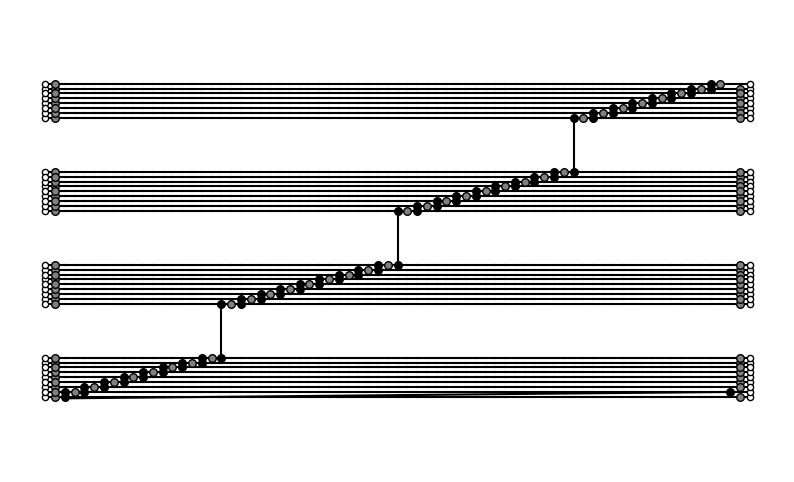

In [32]:
from src.tikz_drawing import *
from src.mpl_drawing import *
assignment = assignment_list[np.argmin(cost_list)]

mpl_fig = hypergraph_to_matplotlib(
    graph, 
    num_qubits,
    assignment,
    qpu_info,
    depth+1,
    sum(qpu_info),
    xscale=depth,
    yscale=num_qubits,
    figsize=(10, 6),
    save=False,
    path=None,
    ax=None
)